# **author: Elena Pashkova**
dataset: FashionMNIST

**Objective:**
*   Understand the basics of Recurrent Neural Networks (RNNs) and their application in deep learning.
*   Practice building and training RNN models for real-world problems.



# **Understanding RNN Basics**
**Basic Architecture of RNNs and How They Differ from Traditional Feedforward Neural Networks**

Recurrent Neural Networks (RNNs) are a type of neural network architecture designed to handle sequential data by maintaining a "memory" of previous inputs. Unlike traditional feedforward neural networks, which process inputs independently, RNNs have connections that allow information to persist, creating dependencies between inputs over time. In an RNN, the output from each step depends not only on the current input but also on the output from the previous step. This is achieved through a loop within the network that enables the model to pass information from one step of the sequence to the next.

In a traditional feedforward neural network, information flows in one direction — from the input layer, through the hidden layers, to the output layer. Each input is processed independently, which makes it unsuitable for tasks where context from previous inputs is needed, such as language processing or time series prediction. RNNs, with their ability to process sequential data, are more effective in these cases.

---

**The Concept of "Short-Term Memory" in RNNs**

The "short-term memory" in RNNs refers to the network's ability to retain information from previous time steps within a sequence. This memory allows RNNs to capture dependencies in data, such as the context of a word in a sentence based on prior words. However, this memory is inherently limited, as RNNs can struggle with maintaining information over long sequences. This issue is known as the "vanishing gradient problem," where gradients become very small as they are backpropagated through time, leading to a loss of long-term information.

Short-term memory makes RNNs suitable for tasks where recent past information is crucial, but they may struggle with longer dependencies. Variants like LSTMs (Long Short-Term Memory networks) and GRUs (Gated Recurrent Units) have been developed to improve the network's ability to maintain information over longer periods.

---

**Advantages and Disadvantages of Using RNNs**

*Advantages:*

*   Sequential Processing: RNNs are designed to handle sequential data, making them suitable for tasks like natural language processing and time series forecasting, where order and context matter.
*   Temporal Dependencies: RNNs can capture dependencies between time steps in data, enabling them to understand relationships within a sequence (e.g., predicting the next word in a sentence based on previous words).


*Disadvantages:*


*   Vanishing Gradient Problem: RNNs can suffer from the vanishing gradient problem, which makes it difficult for them to learn long-term dependencies.
*   High Computational Cost: RNNs are more computationally intensive than feedforward networks due to their recurrent nature, which requires sequential processing and makes parallelization challenging.


These are key aspects to consider when using RNNs in different types of machine learning tasks.




# **PyTorch Implementation **

In [1]:
# Install and Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load and Preprocess the Fashion-MNIST Dataset

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

# Download and load the Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [3]:
# Set Hyperparameters and Instantiate the Model

# Hyperparameters
input_size = 28          # Each row of pixels as one time step
sequence_length = 28      # Number of rows
hidden_size = 256         # Increased hidden size
num_layers = 3            # Increased number of layers
num_classes = 10
learning_rate = 0.0005    # Reduced learning rate
num_epochs = 15           # Increased number of epochs

In [4]:
# Define the RNN Model

# Define the updated RNN model with modified hidden size and number of layers
class FashionMNISTRNN(nn.Module):
    def __init__(self, input_size=28, hidden_size=256, num_layers=3, num_classes=10):
        super(FashionMNISTRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define the RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        # Define a fully connected output layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Get the last time step's output
        out = self.fc(out[:, -1, :])
        return out

In [5]:
# Initialize model, loss function, and optimizer with updated hyperparameters
model = FashionMNISTRNN(input_size, hidden_size, num_layers, num_classes).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# Train the Model

# Training loop with increased epochs
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, sequence_length, input_size)
        images = images.reshape(-1, sequence_length, input_size).to('cuda')
        labels = labels.to('cuda')

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/15], Step [100/938], Loss: 0.9122
Epoch [1/15], Step [200/938], Loss: 1.1335
Epoch [1/15], Step [300/938], Loss: 0.9104
Epoch [1/15], Step [400/938], Loss: 0.6759
Epoch [1/15], Step [500/938], Loss: 0.8442
Epoch [1/15], Step [600/938], Loss: 0.8974
Epoch [1/15], Step [700/938], Loss: 0.5176
Epoch [1/15], Step [800/938], Loss: 0.7636
Epoch [1/15], Step [900/938], Loss: 0.5517
Epoch [2/15], Step [100/938], Loss: 0.5240
Epoch [2/15], Step [200/938], Loss: 0.4474
Epoch [2/15], Step [300/938], Loss: 0.5894
Epoch [2/15], Step [400/938], Loss: 0.4304
Epoch [2/15], Step [500/938], Loss: 0.5670
Epoch [2/15], Step [600/938], Loss: 0.3353
Epoch [2/15], Step [700/938], Loss: 0.4719
Epoch [2/15], Step [800/938], Loss: 0.4875
Epoch [2/15], Step [900/938], Loss: 0.5165
Epoch [3/15], Step [100/938], Loss: 0.3071
Epoch [3/15], Step [200/938], Loss: 0.4747
Epoch [3/15], Step [300/938], Loss: 0.3406
Epoch [3/15], Step [400/938], Loss: 0.4456
Epoch [3/15], Step [500/938], Loss: 0.6209
Epoch [3/15

In [7]:
# Test the model

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to('cuda')
        labels = labels.to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')


Accuracy on the test set: 85.70%


**Short summaryy of improvements done to the model, between previous version and this:**

**Before:**Initially, the RNN model had a hidden_size of 128, num_layers set to 2, a learning rate of 0.001, and was trained for only 5 epochs. The model's loss fluctuated considerably, and the accuracy on the test set was moderate, indicating some instability in training and limited learning capacity.

**What Changed:** I increased the hidden_size to 256, num_layers to 3, reduced the learning rate to 0.0005, and extended the training to 15 epochs. These adjustments aimed to improve model capacity, stabilize training, and allow the model more time to converge.

**Improvement**: The changes resulted in smoother loss reduction, better stability in training, and improved test accuracy, reaching 85.70%. The model now shows stronger generalization and a better ability to capture complex patterns in the Fashion-MNIST dataset.

**Next Steps:**
To further improve the model, you might consider:


*   Trying LSTM or GRU Layers: Since they handle long-term dependencies better, they might further boost performance.
*   Experimenting with Dropout: Adding dropout layers can prevent potential overfitting, especially with a larger model.
*   Fine-Tuning Hyperparameters: Minor adjustments to learning rate, batch size, or hidden layer size could yield slight performance boosts.


**Additional Testing with Precision, Recall, and F1 Score**

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
# Collect predictions and labels
all_preds = []
all_labels = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Turn off gradients for testing
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to('cuda')
        labels = labels.to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Now calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8633
Recall: 0.8570
F1 Score: 0.8582


The model achieved an accuracy of 85.70% on the test set. Additional evaluation metrics indicate a precision of 86.33%, recall of 85.70%, and an F1 score of 85.82%. These metrics suggest that the model has a balanced performance in correctly identifying the Fashion-MNIST categories, with good precision and recall, which confirms its ability to generalize well to new data. Overall, the model demonstrates effective classification capabilities for this dataset.

If further improvements are desired, fine-tuning hyperparameters or experimenting with different RNN architectures like LSTMs could be considered.

**Visualization**


In [9]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

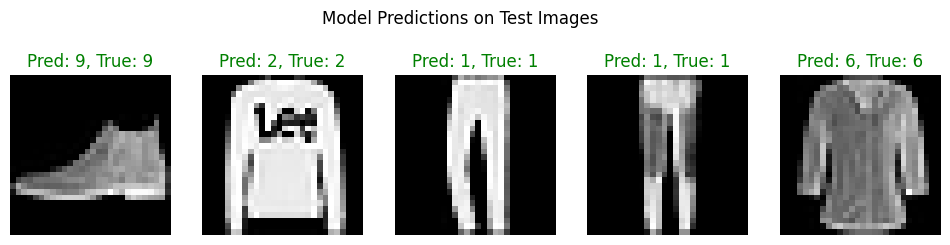

In [10]:
# Get a batch of test images and labels
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Use next(dataiter) directly
images = images[:5].reshape(-1, sequence_length, input_size).to('cuda')
labels = labels[:5].to('cuda')

# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot results
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    # Convert image from tensor to numpy and reshape for display
    img = images[i].cpu().reshape(28, 28)
    true_label = labels[i].item()
    pred_label = predicted[i].item()

    # Display image
    axes[i].imshow(img, cmap='gray')

    # Set title as "Correct" or "Incorrect" with labels
    title_color = "green" if pred_label == true_label else "red"
    axes[i].set_title(f"Pred: {pred_label}, True: {true_label}", color=title_color)
    axes[i].axis('off')  # Hide axes for a cleaner look

plt.suptitle("Model Predictions on Test Images")
plt.show()